https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition

In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

# input 폴더내에 있는 파일리스트
print(os.listdir("./dogs_vs_cats_classification"))

['test1', 'train']


In [2]:
FAST_RUN = False
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

In [9]:
filenames = os.listdir("./dogs_vs_cats_classification/train/train")

categories = []

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else :
        categories.append(0)

print(categories)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## 파일명과 카테고리로 데이터 프레임을 만들자

In [5]:
df = pd.DataFrame({
    'filename': filenames,
    'category': categories})

df

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1


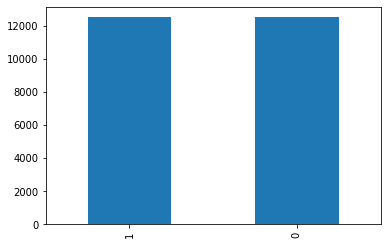

In [6]:
df['category'].value_counts().plot.bar()

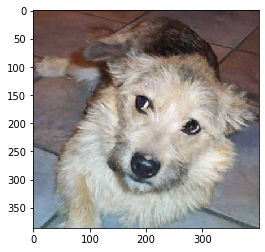

In [7]:
sample = random.choice(filenames)
image = load_img("./dogs_vs_cats_classification/train/train/"+sample)
plt.imshow(image)

In [16]:
df['category']=df['category'].replace({0:'cat',1:'dog'})
df

,filename,category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat
...,...,...
24995,dog.9995.jpg,dog
24996,dog.9996.jpg,dog
24997,dog.9997.jpg,dog
24998,dog.9998.jpg,dog


In [17]:
# 학습용 데이터랑 검증용 데이터를 나눠봅니다.
# df중에서 20% 비율로 검증용 데이터를 만듭니다.
# 랜덤 스테이트는 42로 둡니다.
# 42로 맞춰놓으면 항상 같은 파일들로 분류합니다.
train_df, validate_df = train_test_split(df, test_size = 0.2, random_state = 42)
# 계속 나눠지니까 한번만 실행합니다.
# 두번이상 실행한 경우 위에서부터 다시 실행합니다

In [18]:
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [19]:
train_df

,filename,category
0,dog.8479.jpg,dog
1,dog.876.jpg,dog
2,cat.10915.jpg,cat
3,dog.10127.jpg,dog
4,cat.11377.jpg,cat
...,...,...
19995,dog.6916.jpg,dog
19996,cat.36.jpg,cat
19997,cat.10771.jpg,cat
19998,dog.1713.jpg,dog


In [20]:
validate_df

,filename,category
0,cat.493.jpg,cat
1,dog.9112.jpg,dog
2,cat.745.jpg,cat
3,dog.11022.jpg,dog
4,dog.11363.jpg,dog
...,...,...
4995,cat.6551.jpg,cat
4996,cat.9403.jpg,cat
4997,cat.236.jpg,cat
4998,dog.6530.jpg,dog


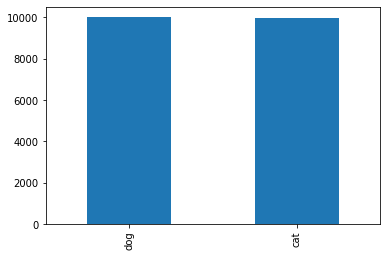

In [21]:
train_df['category'].value_counts().plot.bar()

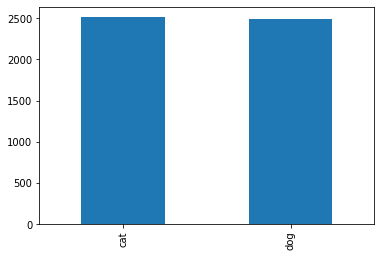

In [22]:
validate_df['category'].value_counts().plot.bar()

In [27]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15


In [24]:
# 이미지 뻥튀기를 사용해보자
# 이미지 뻥튀기를 하는 이유
# 이미지 수가 너무 적으면 과적합이 일어날 수 있습니다.
# 이미지 뻥튀기들이 많아지면, 이미지들이 많아지는 것이니깐 학습데이터가 많아져서 좋은 것이지!

train_datagen = ImageDataGenerator(
    rotation_range = 15,  # 정수 무작위 회전의 각도 범위
    rescale = 1. /255,
    shear_range = 0.1, # 층밀리기에 강도입니다.
    zoom_range = 0.2,  # 무작위 줌의 범위입니다.
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

In [28]:

#ImageDataGenerator함수를 이용하여 지정된 파라미터로 원본이미지에 대해 데이터 부풀리기를 수행한 후 그 결과를 특정 폴더에 저장하는 코드입니다. 
#여러 파라미터를 사용하였기 때문에 이를 혼합하여 데이터 부풀리기를 수행합니다. 
#즉 확대/축소도 하고 좌우 이동도 지정하였다면, 
#축소하면서 좌로 이동된 이미지도 생성됩니다.

train_generator = train_datagen.flow_from_dataframe(
    train_df, # 학습용 데이터프레임
    "./dogs_vs_cats_classification/train/train/", 
    x_col='filename',
    y_col='category',
    target_size = IMAGE_SIZE, #
    class_mode = 'categorical',
    #class_mode : 분류 방식에 대해서 지정합니다.
    #categorical : 2D one-hot 부호화된 라벨이 반환됩니다.
       batch_size = batch_size) # 위에서 선언한 배치 사이즈를 정해준다.

 

Found 20000 validated image filenames belonging to 2 classes.


In [29]:
# 검증용 데이터도 똑같이 다뤄줍니다~
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./dogs_vs_cats_classification/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [32]:
# 뻥튀기가 잘 되었는지 한번 확인해봅시다
# 샘픔 데이터 프레임을 만들어봅니다.
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "./dogs_vs_cats_classification/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)


example_df

Found 1 validated image filenames belonging to 1 classes.


,filename,category
0,cat.9374.jpg,cat


<function matplotlib.pyplot.show(*args, **kw)>

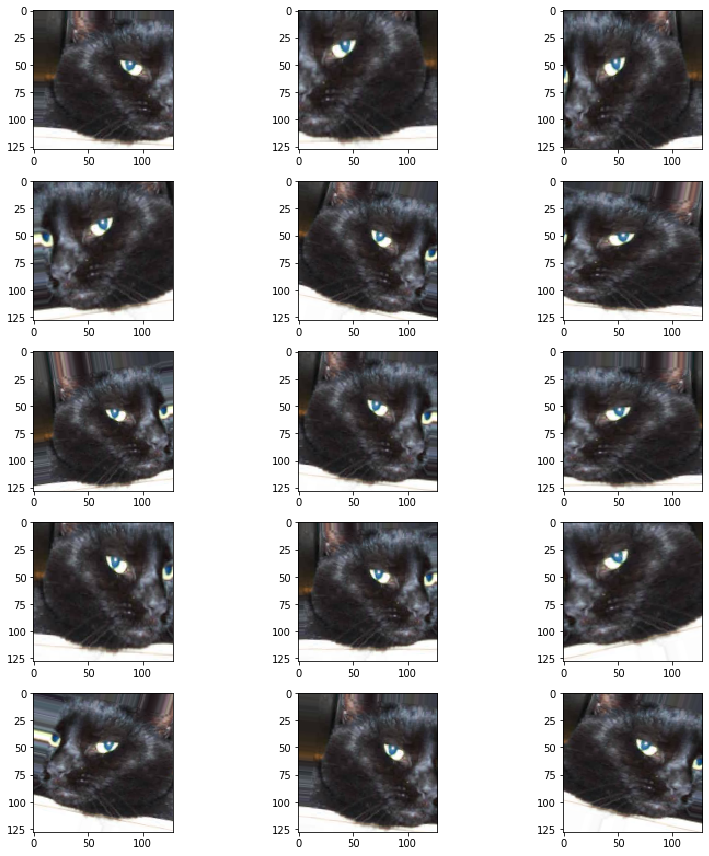

In [43]:
# 위에서 랜덤으로 픽업한 이미지를 
# 20개 이상의 이미지로 뻥튀기한 결과입니다.

###???????????????? X_batch랑 Y_batch는 왜 했을까??
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for X_batch, Y_batch in example_generator: # 샘플 제네레이터로 만든 그림에서 X_batch,Y_batch를 뽑아와서
        image = X_batch[0]
        plt.imshow(image)
        break
        
plt.tight_layout()
plt.show

In [44]:
# keras에서 이것저것 불러옵니다.
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 127008)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               65028608  
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2

In [45]:
# 과적합 성향을 보이기 시작하면 콜백을 부릅니다.
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 10번의 epoches 동안 로쓰값이 줄어들지 않으면 일찍 멈추자는 약속
earlystop = EarlyStopping(patience=10)

In [46]:
# 2번 도는 동안 정확도가 올라가지 않으면 학습속도를 줄이겠다는 약속
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# 그 모든것을 콜백에 담았습니다.
callbacks = [earlystop, learning_rate_reduction]

In [47]:
# 만든 모델에 한번 돌려봅시다!
epochs=1 # if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Instructions for updating:
Please use Model.fit, which supports generators.
   9/1333 [..............................] - ETA: 19:01 - loss: 3.3586 - accuracy: 0.5926

KeyboardInterrupt: 